In [12]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
import os
import time
from modules import local_healpix_qu2eb_masked as lh

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [23]:
nside=128 ; upnside=nside ; npix=h.nside2npix(upnside)
lmax=3*nside ; lmin=2
ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

odisc=min(180.,180.*(24./lmax))
print odisc

11.25


In [19]:
cltemp=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")
cl=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0] # Reverse E and B spectra

#cltemp=h.read_cl("../../data/cl_rem3.fits")
#cl=[cltemp[0],cltemp[1],cltemp[2]*100,cltemp[3]*0] # Reverse E and B spectra

#cl=[cltemp[0],cltemp[2],cltemp[1],cltemp[3]*0] # Reverse E and B spectra

random.seed(0) ; tqu=h.synfast(cl,nside,pol=True,new=True,verbose=False)

# Get teb maps from Healpix.
alm=h.map2alm(tqu,lmax=3*nside,pol=True,iter=5) ; teb=h.alm2map(alm,upnside,pol=False,verbose=False)

# Get data power spectrum.
cld=h.alm2cl(alm)

# Get Q/U corresponding to E and B modes.
#alm[2][:]=0.0 ; equ=h.alm2map(alm,nside=nside,pol=True,verbose=False)
#alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0.0 ; bqu=h.alm2map(alm,nside=nside,pol=True,verbose=False)
#fl=ones(3*nside+1,float) ; fl[:lmin+1]=0

<IPython.core.display.Javascript object>


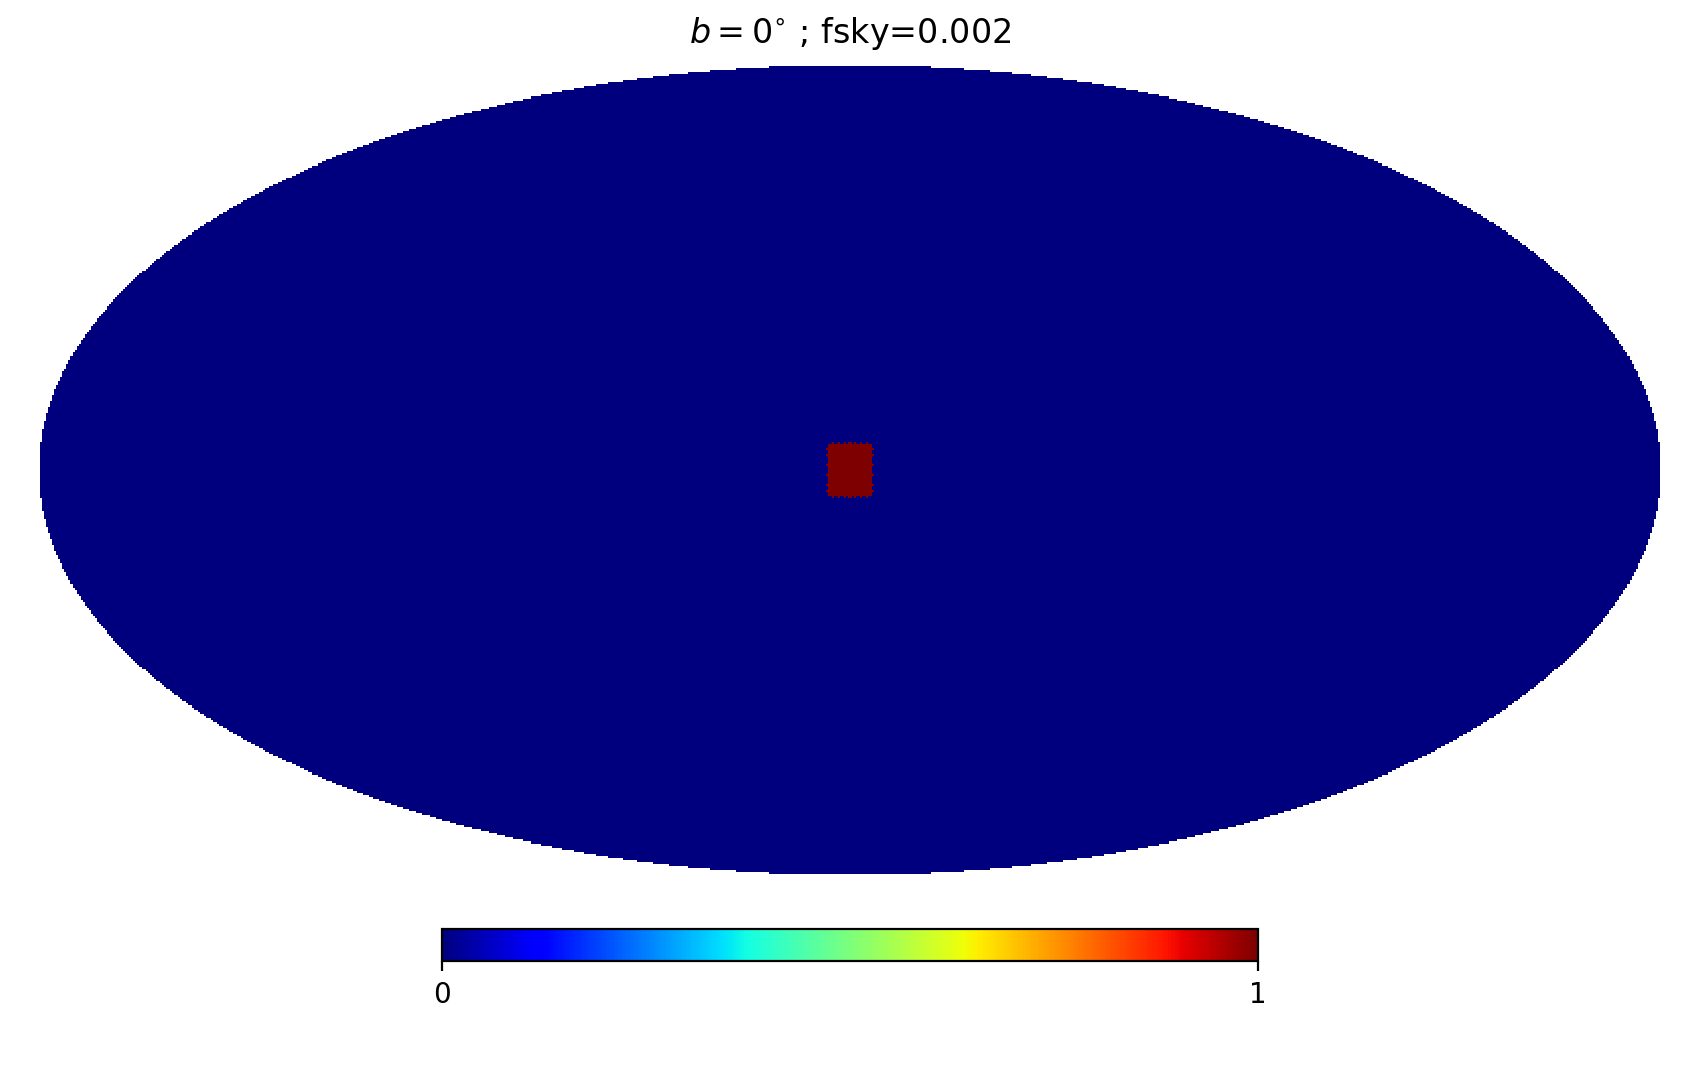

In [27]:
lat=90
tmask=zeros(npix,float)
pmask=zeros(npix,float)
pindex=arange(npix)
theta,phi=h.pix2ang(nside,pindex)
theta=theta*180/pi ; phi=phi*180/pi
wband=5 ; phiband=5
tmask[theta<lat-wband]=1 ; tmask[theta>lat+wband]=1.
pmask[phi<phiband]=1. ; pmask[phi>360-phiband]=1.
mask=pmask*(1-tmask) ; fsky=sum(mask)/size(mask)
h.mollview(mask,title=r"$b=" + str(90-lat) + "^{\circ}$ ; fsky=" + str(round(fsky,3)))
#if genplots:
#    savefig(figpath + "mask-nside" + str(nside) + "_lat" + str(90-lat) +  ".pdf",dpi=300,bbox_inches="tight")
#
#h.write_map(datapath + "mask_nside" + str(nside) + "_lat" + str(90-lat) + ".fits",mask,overwrite=True)
#h.write_map(datapath + "fsteb_nside" + str(nside) + ".fits",teb,overwrite=True)

In [21]:
pindex=nonzero(mask)[0]
t1=time.time()
rteb=lh.return_local_eb(tqu,1.*odisc,nside,lmax,pindex=pindex)

KeyboardInterrupt: 

In [28]:
pindex.size

196608